In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



In [8]:
#Load and preprocess data

otu_path = '/Users/nandini.gadhia/Documents/projects/gp_omics/data/rvc/OTU_table.csv'
metadata_path = '/Users/nandini.gadhia/Documents/projects/gp_omics/data/rvc/metadata.tsv'

df_raw = pd.read_csv(otu_path, header=0, index_col=0)
df_meta = pd.read_csv(metadata_path, sep='\t').set_index('Sample-ID')


common_samples = df_raw.index.intersection(df_meta.index)
df_raw = df_raw.loc[common_samples]
df_meta = df_meta.loc[common_samples]
df_normalized = df_raw.div(df_raw.sum(axis=1), axis=0)

X = df_normalized.values
y = df_meta['Group ID'].apply(lambda val: 0 if str(val).endswith('UC') else 1).values

print(f"Features matrix X shape: {X.shape}")
print(f"Target vector y shape: {y.shape}")
if X.shape[0] != y.shape[0]:
    raise ValueError("Mismatch between nsamples in X and y")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Features matrix X shape: (38, 740)
Target vector y shape: (38,)


In [9]:
#Train binary classifier to predict disease (random forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



--- Model Evaluation ---
Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.82      1.00      0.90         9

    accuracy                           0.83        12
   macro avg       0.91      0.67      0.70        12
weighted avg       0.86      0.83      0.80        12




Confusion Matrix:


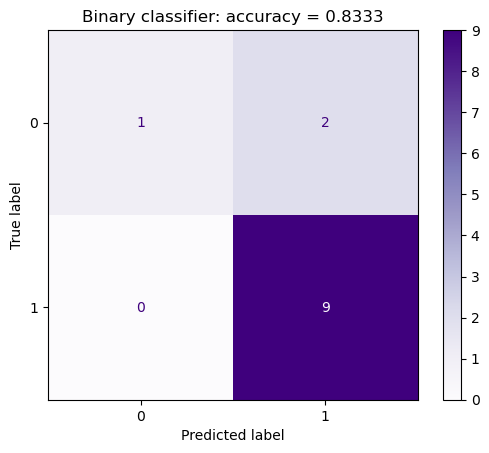

In [10]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title(f"Binary classifier: accuracy = {accuracy_score(y_test, y_pred):.4f}")
plt.show()

In [11]:

print("--- Class Distribution after Train-Test Split ---")

print(f"\nTraining Set Analysis (Total Samples: {len(y_train)}):")
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)

print("Class Counts:")
if len(unique_classes_train) > 0:
    for cls, count in zip(unique_classes_train, counts_train):
        percentage = (count / len(y_train)) * 100
        print(f"  Class '{cls}': {count} samples ({percentage:.2f}%)")
else:
    print("  No samples in the training set.")


print(f"\nTesting Set Analysis (Total Samples: {len(y_test)}):")
unique_classes_test, counts_test = np.unique(y_test, return_counts=True)

print("Class Counts:")
if len(unique_classes_test) > 0:
    for cls, count in zip(unique_classes_test, counts_test):
        percentage = (count / len(y_test)) * 100
        print(f"  Class '{cls}': {count} samples ({percentage:.2f}%)")
else:
    print("  No samples in the testing set.")


--- Class Distribution after Train-Test Split ---

Training Set Analysis (Total Samples: 26):
Class Counts:
  Class '0': 7 samples (26.92%)
  Class '1': 19 samples (73.08%)

Testing Set Analysis (Total Samples: 12):
Class Counts:
  Class '0': 3 samples (25.00%)
  Class '1': 9 samples (75.00%)


In [12]:
# With all condiitions

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

y_raw = df_meta['Group ID'].astype(str)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 7. Train Classifier ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 8. Evaluate ---
y_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



--- Model Evaluation ---
Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

        UV-C       1.00      0.33      0.50         3
      UV-C10       0.60      1.00      0.75         3
       UV-UC       1.00      1.00      1.00         3
         V-C       1.00      1.00      1.00         3

    accuracy                           0.83        12
   macro avg       0.90      0.83      0.81        12
weighted avg       0.90      0.83      0.81        12




Confusion Matrix:
['UV-C' 'UV-C10' 'UV-UC' 'V-C']


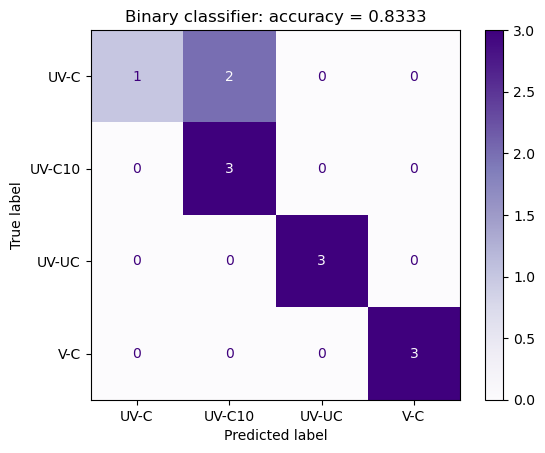

In [13]:
print("\nConfusion Matrix:")
print(label_encoder.classes_)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Purples')
plt.title(f"Binary classifier: accuracy = {accuracy_score(y_test, y_pred):.4f}")
plt.show()

In [14]:
print(" -- Class Distribution after Train-Test Split")

print(f"\nTraining Set Analysis (Total Samples: {len(y_train)}):")
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)

print("Class Counts:")
if len(unique_classes_train) > 0:
    for cls, count in zip(label_encoder.classes_, counts_train):
        percentage = (count / len(y_train)) * 100
        print(f"  Class '{cls}': {count} samples ({percentage:.2f}%)")
else:
    print("  No samples in the training set.")

print(f"\nTesting Set Analysis (Total Samples: {len(y_test)}):")
unique_classes_test, counts_test = np.unique(y_test, return_counts=True)

print("Class Counts:")
if len(unique_classes_test) > 0:
    for cls, count in zip(label_encoder.classes_, counts_test):
        percentage = (count / len(y_test)) * 100
        print(f"  Class '{cls}': {count} samples ({percentage:.2f}%)")
else:
    print("  No samples in the testing set.")


 -- Class Distribution after Train-Test Split

Training Set Analysis (Total Samples: 26):
Class Counts:
  Class 'UV-C': 7 samples (26.92%)
  Class 'UV-C10': 5 samples (19.23%)
  Class 'UV-UC': 7 samples (26.92%)
  Class 'V-C': 7 samples (26.92%)

Testing Set Analysis (Total Samples: 12):
Class Counts:
  Class 'UV-C': 3 samples (25.00%)
  Class 'UV-C10': 3 samples (25.00%)
  Class 'UV-UC': 3 samples (25.00%)
  Class 'V-C': 3 samples (25.00%)


/var/folders/l5/mpp7rczn7n96jlt9_1s45rkm0000gp/T/ipykernel_42844/3294921591.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


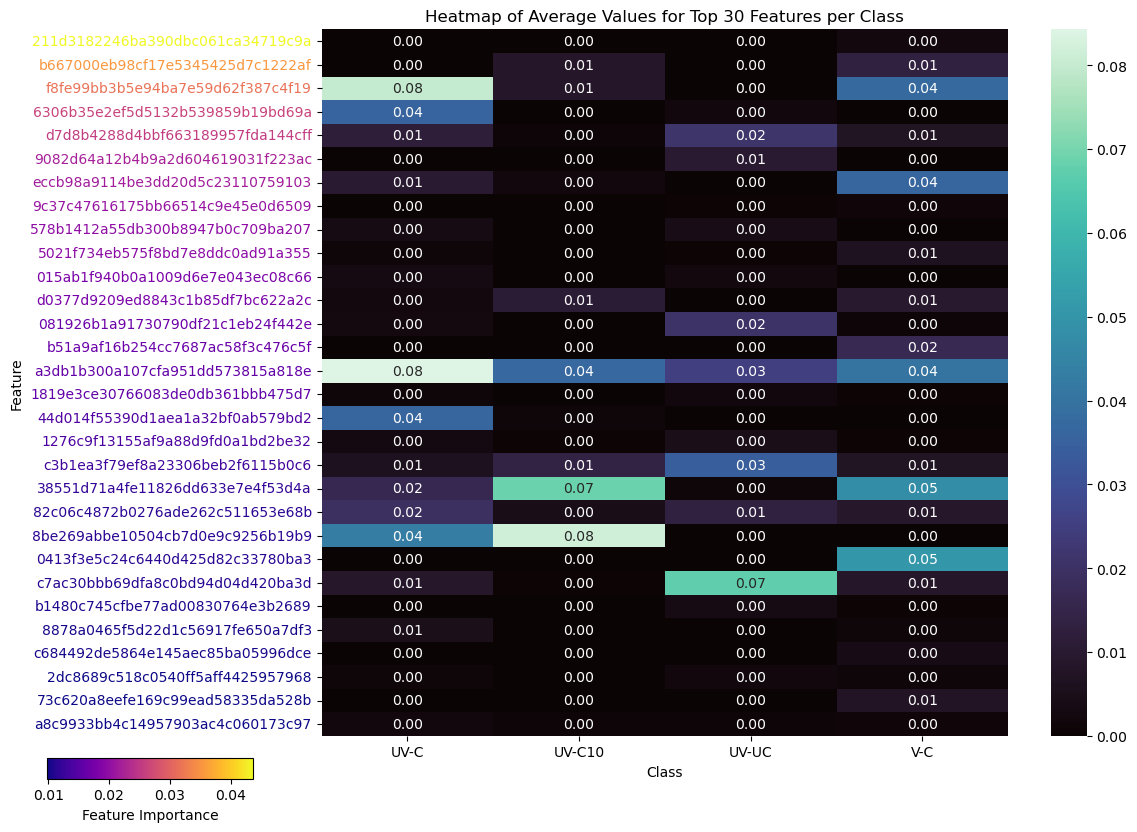

In [17]:
from matplotlib.cm import ScalarMappable

importances = model.feature_importances_
feature_names = df_raw.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

top_n = 30
top_features_df = feature_importance_df.nlargest(top_n, 'importance')
top_features = top_features_df['feature'].tolist()

X_df = pd.DataFrame(X, columns=df_raw.columns)

# Select the top features
data_to_plot = X_df[top_features].copy()
data_to_plot['target_class'] = y

# Compute average values for each class
average_values = data_to_plot.groupby('target_class').mean()

# Transpose for heatmap: rows = features, columns = classes
average_values_transposed = average_values.T

# Reorder heatmap rows by feature importance
average_values_transposed = average_values_transposed.loc[top_features_df['feature'].values]

# Normalize importance for color mapping
norm = mcolors.Normalize(vmin=top_features_df['importance'].min(), vmax=top_features_df['importance'].max())
cmap = plt.cm.plasma
colors = [cmap(norm(imp)) for imp in top_features_df['importance']]

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    average_values_transposed,
    annot=True,
    cmap="mako",
    fmt=".2f",
    xticklabels=label_encoder.classes_,
    ax=ax
)
ax.set_title(f'Heatmap of Average Values for Top {top_n} Features per Class')
ax.set_xlabel('Class')
ax.set_ylabel('Feature')

# Color y-axis tick labels
for tick_label, color in zip(ax.get_yticklabels(), colors):
    tick_label.set_color(color)


cax = inset_axes(ax,
                 width="60%",  # Width of colorbar
                 height="3%",  # Height of colorbar
                 loc='lower center',
                 bbox_to_anchor=(-0.5, -0.1, 0.5, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=2)



sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Needed for colorbar
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Feature Importance')

plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import sampling techniques from imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
# Utility to check class distribution
from collections import Counter


# --- 2. Split Data (Stratified) ---
# Stratify ensures test set *also* reflects the original imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set shape before resampling: {Counter(label_encoder.inverse_transform(y_train))}")
print(f"Test set shape: {Counter(label_encoder.inverse_transform(y_test))}")

# --- 3. Scale Features ---
# Scale data *after* splitting, fit *only* on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use the same scaler fitted on train data

# --- 4. Apply Sampling (ONLY ON TRAINING DATA) ---
# Choose ONE of the following methods (or experiment)

# Method 1: SMOTE (Oversampling)
print("\nApplying SMOTE...")
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print(f"Training set shape after SMOTE: {Counter(label_encoder.inverse_transform(y_train_resampled))}")

# # Method 2: RandomUnderSampler (Undersampling)
# print("\nApplying RandomUnderSampler...")
# rus = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)
# print(f"Training set shape after RandomUnderSampler: {Counter(label_encoder.inverse_transform(y_train_resampled))}")

# # Method 3: SMOTETomek (Combined Sampling)
# print("\nApplying SMOTETomek...")
# smt = SMOTETomek(random_state=42)
# X_train_resampled, y_train_resampled = smt.fit_resample(X_train_scaled, y_train)
# print(f"Training set shape after SMOTETomek: {Counter(label_encoder.inverse_transform(y_train_resampled))}")

# --- 5. Train Classifier (Using Resampled Training Data) ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# --- 6. Evaluate (Using Original Scaled Test Data) ---
# Predict on the original, scaled, *unseen* test data
y_pred = model.predict(X_test_scaled)

print("\n--- Model Evaluation (After Resampling Training Data) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nConfusion Matrix:")
# Use original labels for confusion matrix readability
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_))


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# --- Optional: Train and Evaluate WITHOUT Resampling for Comparison ---
print("\n--- Training and Evaluating WITHOUT Resampling (for comparison) ---")
model_no_resample = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit on the original scaled training data
model_no_resample.fit(X_train_scaled, y_train)
# Predict on the original scaled test data
y_pred_no_resample = model_no_resample.predict(X_test_scaled)

print(f"Accuracy (No Resampling): {accuracy_score(y_test, y_pred_no_resample):.4f}")
print("\nConfusion Matrix (No Resampling):")
cm_no_resample = confusion_matrix(y_test, y_pred_no_resample)
print(pd.DataFrame(cm_no_resample, index=label_encoder.classes_, columns=label_encoder.classes_))
print("\nClassification Report (No Resampling):")
print(classification_report(y_test, y_pred_no_resample, target_names=label_encoder.classes_))

Training set shape before resampling: Counter({'UV-UC': 7, 'UV-C': 7, 'V-C': 7, 'UV-C10': 5})
Test set shape: Counter({'UV-C': 3, 'UV-UC': 3, 'UV-C10': 3, 'V-C': 3})

Applying SMOTE...
Training set shape after SMOTE: Counter({'UV-UC': 7, 'UV-C10': 7, 'UV-C': 7, 'V-C': 7})

--- Model Evaluation (After Resampling Training Data) ---
Accuracy: 0.9167

Confusion Matrix:
        UV-C  UV-C10  UV-UC  V-C
UV-C       2       1      0    0
UV-C10     0       3      0    0
UV-UC      0       0      3    0
V-C        0       0      0    3

Classification Report:
              precision    recall  f1-score   support

        UV-C       1.00      0.67      0.80         3
      UV-C10       0.75      1.00      0.86         3
       UV-UC       1.00      1.00      1.00         3
         V-C       1.00      1.00      1.00         3

    accuracy                           0.92        12
   macro avg       0.94      0.92      0.91        12
weighted avg       0.94      0.92      0.91        12


--- Tra